In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
df=pd.read_csv("advertising.csv", header=0)

In [3]:
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [7]:
print(df.columns)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [14]:
df.columns = df.columns.str.strip()

In [19]:
features = ['TV', 'Radio', 'Newspaper']

In [20]:
X = df[features]

In [10]:
scaler = StandardScaler()

In [21]:
X_scaled = scaler.fit_transform(X)

In [22]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\bhoom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhoom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bhoom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhoom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

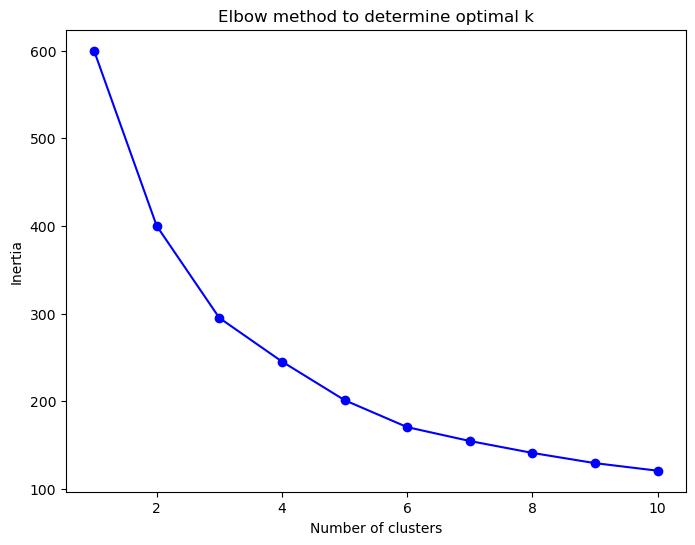

In [23]:
plt.figure(figsize=(8,6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method to determine optimal k')
plt.show()

In [25]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\bhoom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhoom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
print(df.groupby('Cluster').mean())

                 TV      Radio  Newspaper      Sales
Cluster                                             
0        220.083077  18.413846  18.687692  18.469231
1         69.537333  15.933333  21.060000  10.045333
2        164.796667  37.681667  55.276667  17.870000


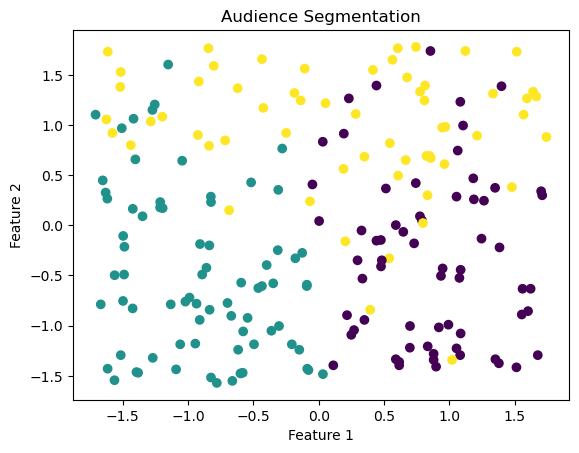

In [28]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Audience Segmentation')
plt.show()

In [31]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)

In [37]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.9077569102710923


In [39]:
results = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})
print(results)

     Actual Sales  Predicted Sales
95           16.9        17.034772
15           22.4        20.409740
30           21.4        23.723989
158           7.3         9.272785
128          24.7        21.682719
115          12.6        12.569402
69           22.3        21.081195
170           8.4         8.690350
174          16.5        17.237013
45           16.1        16.666575
66           11.0         8.923965
182           8.7         8.481734
165          16.9        18.207512
78            5.3         8.067507
186          10.3        12.645510
177          16.7        14.931628
56            5.5         8.128146
152          16.6        17.898766
82           11.3        11.008806
68           18.9        20.478328
124          19.7        20.806318
16           12.5        12.598833
148          10.9        10.905183
93           22.2        22.388548
65           11.3         9.417961
60            8.1         7.925067
84           21.7        20.839085
67           13.4   

In [40]:
new_data = [[150, 25, 30]]
predicted_sales = model.predict(new_data)
print(f"Predicted Sales for new data: {predicted_sales[0]}")

Predicted Sales for new data: 15.544250492282014


C:\Users\bhoom\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
